In [1]:
import numpy as np
#from parflow import Run
import sys
from parflow.tools.io import read_pfb,write_pfb
#import parflow.tools.hydrology as hydro
import matplotlib.pyplot as plt

In [10]:
water_year = 2003
# Directory where averages are saved to
directory_out = f'/glade/scratch/tijerina/CONUS2/spinup_WY2003/averages'

In [11]:
flow = np.squeeze(read_pfb(f'{directory_out}/flow.{water_year}.daily.001.pfb'))

In [12]:
flow.shape

(3256, 4442)

(array([  12,   13,   14, ..., 3247, 3247, 3248]),
 array([1889, 1889, 1888, ...,  745,  746,  744]))

In [8]:
daily_flow = np.zeros(1)
for i in range(5):
    step = str(int(i+1)).rjust(3, '0')
    #flow_pfb = np.squeeze(read_pfb(f'{directory_out}/flow.2003.daily.{step}.pfb'))
    #daily_flow[i]=flow_pfb[15,23]
    print(step)

001
002
003
004
005


Text(0.5, 1.0, 'Total Daily Flow')

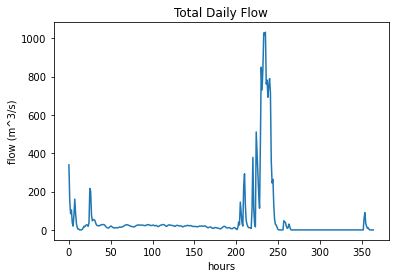

In [9]:
plt.plot(range(len(daily_flow)),daily_flow)
plt.xlabel("hours")
plt.ylabel("flow (m^3/s)")
plt.title("Total Daily Flow")